# 1. 문제정의

 - 머신러닝을 통해서 해결하고싶은 문제를 정하기

In [1]:
# 비만을 판단하는 모델 만들기

# 2. 데이터 수집
 - 문제를 해결하기 위한 데이터 수집
 - kaggle, ai hub, 공공데이터포털
 - 크롤링
 - DB

In [2]:
# 500명에 대한 성별, 키, 몸무게, 비만도에 대한 데이터
import pandas as pd
bmi = pd.read_csv('bmi_500.csv')
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


# 3. 데이터 전처리
 - 결측치, 이상치 처리

In [3]:
# 결측치 확인
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [4]:
# 이상치 확인
# 이상치 : 정상적인 범위를 벗어나는 데이터
# describe : 기술 통계치 확인하는 함수
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


# 4. 탐색적 데이터 분석
 - 데이터를 자세히 살펴보자
 - 비만도별로 데이터가 잘 나뉘어져있는지 확인하기


In [5]:
# Label의 값이 Normal인 데이터 확인
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [6]:
# Label의 값이 Normal인 데이터의 키아 몸무게 확인하기
bol = bmi['Label'] == "Normal"
normal = bmi.loc[bol]
normal

,Gender,Height,Weight,Label
1,Male,189,87,Normal
10,Male,195,81,Normal
13,Male,155,51,Normal
14,Male,191,79,Normal
24,Female,172,67,Normal
...,...,...,...,...
472,Female,178,65,Normal
477,Male,167,64,Normal
478,Female,151,55,Normal
487,Male,187,80,Normal


In [7]:
def myScatter(label, color):
    bol = bmi['Label'] == label
    normal = bmi.loc[bol]
    plt.scatter(normal['Height'], normal['Weight'], color = color, label = label)

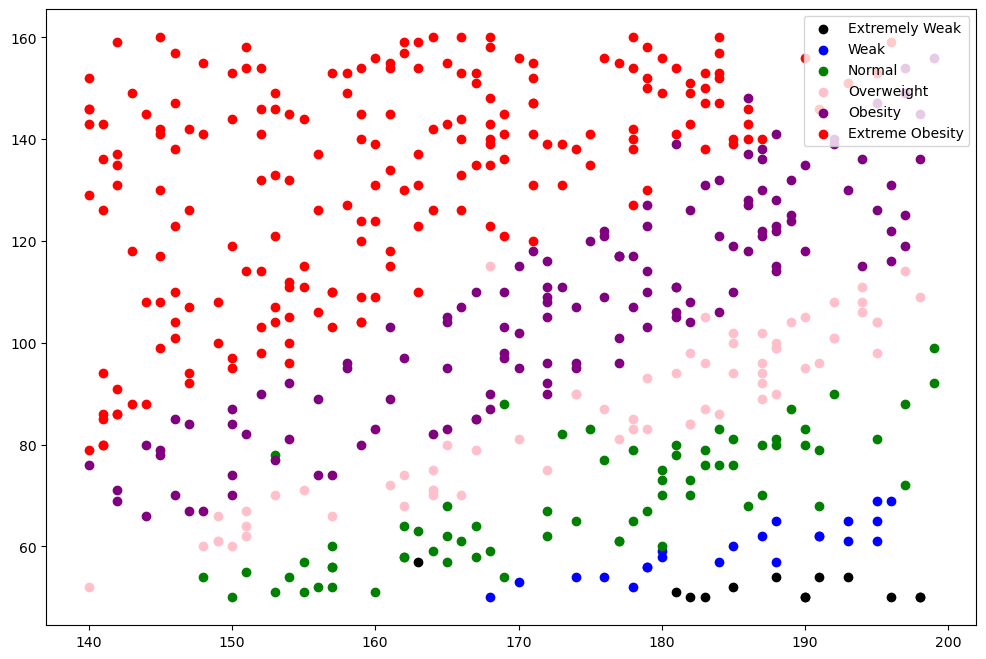

In [8]:
# Scatter 그래프(산점도)
import matplotlib.pyplot as plt
# matplotlib : 그래프 그리는 라이브러리

plt.figure(figsize = (12, 8))
myScatter('Extremely Weak','black')
myScatter('Weak','blue')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Obesity','purple')
myScatter('Extreme Obesity','red')


plt.legend() # label 그래프에 표시하기
plt.show() # 위에서 그린 모든 그래프 출력후 초기화

In [9]:
# label이 normal이고 키가 153이고 몸무게가 78인 사람의 데이터
bol = bmi['Label']=='Normal'
normal = bmi.loc[bol]
bol1 = normal['Height']==153
normal.loc[bol1] #231번 인덱스

,Gender,Height,Weight,Label
70,Female,153,51,Normal
231,Female,153,78,Normal


In [10]:
bmi.loc[231, 'Label'] = 'Obesity'

In [11]:
# label이 normal이고 키가 153이고 몸무게가 78인 사람의 데이터
bol = bmi['Label']=='Normal'
normal = bmi.loc[bol]
bol1 = normal['Height']==153
normal.loc[bol1] #231번 인덱스

,Gender,Height,Weight,Label
70,Female,153,51,Normal


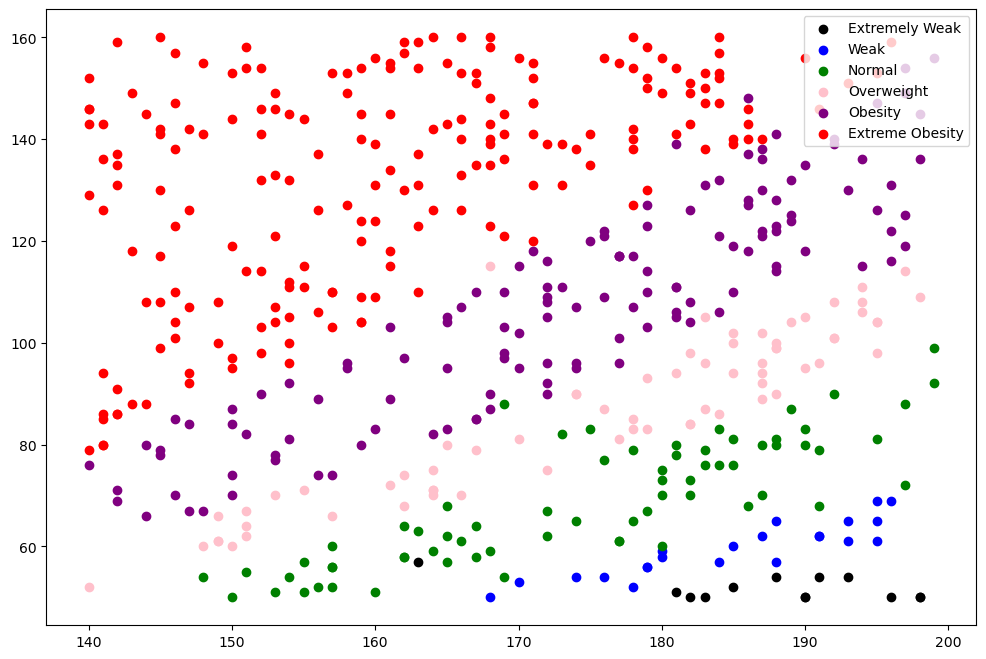

In [12]:
import matplotlib.pyplot as plt
# matplotlib : 그래프 그리는 라이브러리

plt.figure(figsize = (12, 8))
myScatter('Extremely Weak','black')
myScatter('Weak','blue')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Obesity','purple')
myScatter('Extreme Obesity','red')


plt.legend() # label 그래프에 표시하기
plt.show() # 위에서 그린 모든 그래프 출력후 초기화

# 5. 모델 선택 및 하이퍼 파라미터 튜닝
- 데이터 나누기(문제, 정답)
- 모델 생성, 하이퍼 파라미터 튜닝


In [13]:
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [14]:
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [15]:
X = bmi.loc[ : , 'Gender':'Weight']
y = bmi.loc[ : , 'Label']

In [16]:
X.shape, y.shape

((500, 2), (500,))

In [23]:
# 훈련(train) : 7, 평가(test) : 3 데이터로 구분
X_train = X.iloc[ :350]
X_test = X.iloc[350 : ]
y_train = y.iloc[ : 350]
y_test = y.iloc[350: ]

In [17]:
# 모델 불러오기
# 모델 : 모델마다 규칙은 다르지만, 문제가 정답을 도출하기위한 규칙 찾음
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# 6. 학습

In [24]:
# 모델에 문제와 정잡데이터를 입력해주는 일
# 모델은 규칙을 스스로 찾는다
knn.fit(X_train,y_train)

KNeighborsClassifier()

# 7. 평가 및 예측

In [21]:
# 예측
# 학습에서 찾은 규칙을 토대로 새로운 값에 대해 결론을 도출하는 것 : 예측
# 예측에 사용하는 데이터는 X데이터와 동일한 형식으로 만들어야 함
knn.predict([[174,70]])


C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)

In [25]:
# 평가
# 규칙이 얼마나 옳은 규칙인가 판단해보기
# 94.4% 확률로 정답이다.
knn.score(X_test,y_test)

0.9066666666666666

In [27]:
knn.score(X_train, y_train)

0.9285714285714286

In [31]:
# 성별컬럼 추가해서 학습하기
# Male > 0, Female >1
# 라벨 인코딩(mapping) : 문자를 숫자로 바꾸는 방법(단어마다 하나의 숫자로 치환)
bmi['Gender'] = bmi['Gender'].map({"Male":0, "Female":1})

In [32]:
bmi

,Gender,Height,Weight,Label
0,0,174,96,Obesity
1,0,189,87,Normal
2,1,185,110,Obesity
3,1,195,104,Overweight
4,0,149,61,Overweight
...,...,...,...,...
495,1,150,153,Extreme Obesity
496,1,184,121,Obesity
497,1,141,136,Extreme Obesity
498,0,150,95,Extreme Obesity


In [41]:
# 모델 선택
# X,y로 나누기
X = bmi.loc[ : , 'Gender':'Weight']
y = bmi.loc[ : , 'Label']

# X_train, X_test, y_train, y_test로 데이터 분리
X_train = X.iloc[ :350]
X_test = X.iloc[350 : ]
y_train = y.iloc[ : 350]
y_test = y.iloc[350: ]

# KNN모델 불러오기
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [42]:
# 학습
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
# 평가 및 예측
knn.predict([[0,174,70]])

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)

In [48]:
# 평가
# 성별은비만도를 예측하는데 도움이 되지 않았따
knn.score(X_test, y_test)

0.9066666666666666

In [46]:
X_train.head(1)

,Gender,Height,Weight
0,0,174,96


In [49]:
knn.score(X_train, y_train)

0.9285714285714286